<a href="https://colab.research.google.com/github/gunjanak/Digital_Image_processing/blob/main/3_high_boost_filter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***High Boost***

High-boost = (A-1)Original - High-pass

In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
def sharp_filter(input_image):
  img = input_image.resize((400,400), Image.ANTIALIAS)

  


  # convert to numpy array 
  numpy_image = np.array(img)
  # array for padding
  array_b = np.zeros((402,402))

  # to pad initial array with zeros in all side
  array_b[1:401,1:401] = numpy_image

  #defining filter
  filter_array = np.array([[-1/9,-1/9,-1/9],
                         [-1/9,8/9,-1/9],
                         [-1/9,-1/9,-1/9]])
  
  #creating empty list
  lst = []

  for i in range(400):
    for j in range(400):
      #extracting part of array equal to filter size
      array_c = array_b[i:(3+i),j:(3+j)]
    
     #applying filter
      array_mul = np.multiply(filter_array,array_c)
      array_sum = np.sum(array_mul)
    
      # putting calculated value in list
      lst.append(array_sum)

  # resizing lst to shape of original array
  final_array = np.resize(lst,(400,400))

  final_image = Image.fromarray(final_array)
  final_image= final_image.convert("L")

    
  return final_image
  

In [27]:
def high_boost(input_image):
  high_pass = sharp_filter(input_image)
  img = input_image.resize((400,400), Image.ANTIALIAS)
  # convert to numpy array 
  numpy_image = np.array(img)

  A = 3
  high_boost = (A-1)*numpy_image + high_pass
  final_image = Image.fromarray(high_boost)
  final_image= final_image.convert("L")

  fig = plt.figure()
  fig.set_figheight(10)
  fig.set_figwidth(10)

  #plotting original image
  fig.add_subplot(1,2,1)
  plt.imshow(img, cmap='gray')
  plt.title('Original')

  #plotting filtered image
  fig.add_subplot(1,2,2)
  plt.imshow(final_image, cmap='gray')
  plt.title('High-boost image')



  return final_image



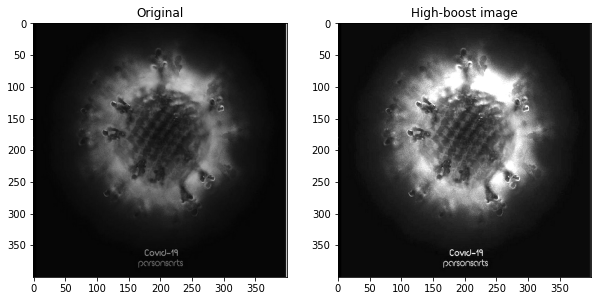

In [26]:
# reading image and converting to gray scale
img = Image.open('/content/drive/MyDrive/Colab Notebooks/image_processing/images/medical1.png').convert('L')
# Calling smooth function 
a = high_boost(img)